In [1]:
import numpy as np

In [2]:
with open("../datasets/shakespeare.txt", "r") as f:
    data = f.read()
    
train = data[round(len(data) * 0.7):]
test = data[:round(len(data) * 0.3)]

In [3]:
import nltk

START = '<S>'
END = '</S>'
NEWLINE = ' NEWLINE '
train = train.replace('\n', NEWLINE)
vocab = np.append(np.unique(nltk.word_tokenize(train)), [START, END, NEWLINE])
V = len(vocab)
print("Vocab:", V)
p_matrix = np.ones((V, V))

Vocab: 7188


In [4]:
from nltk import Counter
encoder = {}
decoder = {}

for index, word in enumerate(vocab):
    encoder[word] = index
    decoder[index] = word
    
train_tokenized = nltk.word_tokenize(train)
N = len(train_tokenized)
counter = Counter(train_tokenized)
for i in range(len(train_tokenized) + 1):
    curr = None
    prev = None
    if i == 0:
        prev = START
        curr = train_tokenized[i]
    elif i == len(train_tokenized):
        prev = train_tokenized[i - 1]
        curr = END
    else:
        prev = train_tokenized[i - 1]
        curr = train_tokenized[i]
    prev_id = encoder[prev]
    curr_id = encoder[curr]
    
    p_matrix[(curr_id, prev_id)] += 1

for i in range(V):
    if decoder[i] != START and decoder[i] != END:
        p_matrix[:, i] /= (counter[decoder[i]] + V)
    else:
        p_matrix[:, i] /= V

In [5]:
s = [START]

for _ in range(100):
    m = p_matrix[:, encoder[s[-1]]]
    m /= np.sum(m)
    word_id = np.random.choice(len(m), p = m)
    word = decoder[word_id]
    s.append(word)
output = " ".join(s).replace(NEWLINE, "\n")

In [27]:
print(output)

<S> half-yard truths bosom obsequious choleric AEacides Prince enforced assisting by couldst kindred sorrow grossly acorn least Reprieve plague Duke drunk Friar Loud trident deaths blushes youth parish wink'st trapp heaven Lend royally capable antic angry acorn misplaces Please afternoon terrible followers decorum blushes young younger wore Priami Theretake cheaper abhorr 'Remember scarlet necklace habited inkles gun revive rigg tackle opening meet forted Hercules match Fair expected upon rates wholesomest dispersed howsoever sheathing afoot safe redeem conference drudge finish Jove decrees other dedicate forfeit image When pawn verdure carry Wrench stain Work Claribel natural legs invite crab Tongue grazing distance fancy


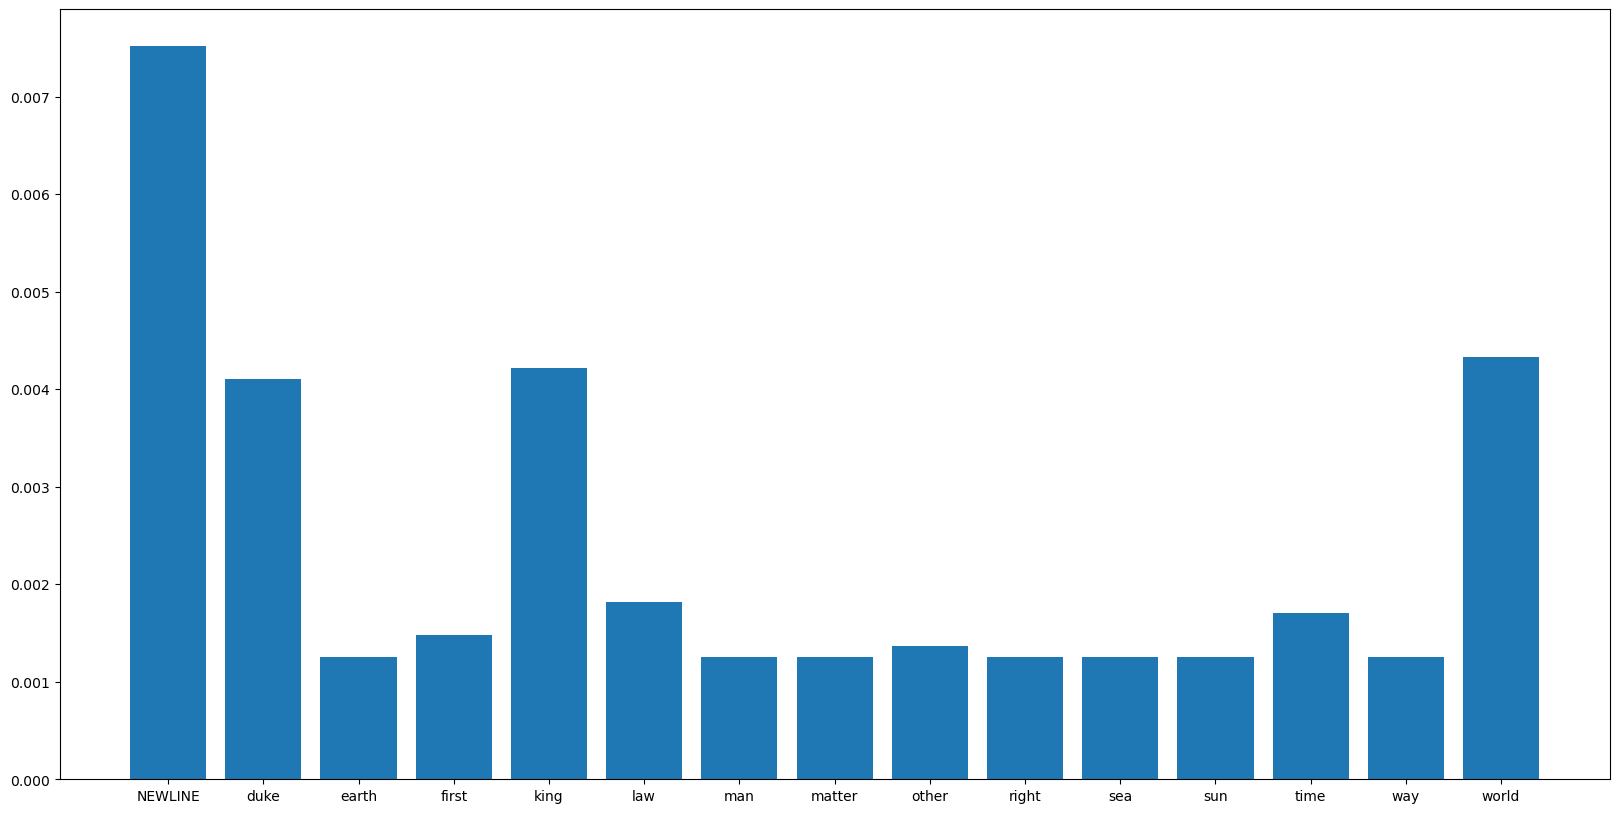

In [37]:
import matplotlib.pyplot as plt

m = p_matrix[:, encoder["the"]]
idx = m > 0.0012
m = m[idx]

plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(m)), m)
legend = [decoder[i] for i in np.where(idx)[0]]
plt.xticks(np.arange(len(m)), legend)
plt.show()